Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 18, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

**Euclidean space** A two-, three- or _n_-dimensional space in which the axioms of Euclidean geometry apply; a space in any finite number of dimensions, in which points are designated by coordinates (one for each dimension) and the distance between two points is given by a distance formula, e.g. $\sqrt{(a − c)^2 + (b − d)^2}$ for the distance between points $(a,b)$ and $(c,d)$ in a 2D space (i.e. Pythagoras).

**Cartesian plane** A Euclidean plane (2D-space) with a Cartesian coordinate system. In a Cartesian plane one can define canonical representatives of certain geometric figures, such as the unit circle (with radius equal to the length unit, and center at the origin). The points in it are unambiguous and can be identified with pairs of real numbers (i.e. the Cartesian product) $\mathbb{R}^{2} = \mathbb{R} \times \mathbb{R}$.

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

The **norm** denotes the **length** of a vector. In an _n_-dimensional Euclidean space $\mathbb{R}^n$, the length of the vector $x = (x_1, x_2, ..., x_n)$ is captured by the formula $||x|| = \sqrt{{x_1}^2 ... {x_n}^2}$.

Given the vectors $a$ and $b$ of length $n$, the **sum** of $a$ and $b$ is $a + b = (a_1+b_1) + ... + (a_n+b_n).$ Essentially, it is like drawing an arrow from the tail of $a$ to the head of $b$.

Given the vectors $a$ and $b$ of length $n$, the **difference** of $a$ and $b$ is $a - b = (a_1-b_1) + ... + (a_n-b_n).$ Essentially, it is like drawing an arrow from the head of $b$ to the head of $a$.

The **Euclidean distance** is the "ordinary" straight-line distance between two points in Euclidean space. Others include the normalized Euclidean distance, the Pearson distance, the Mahalanobis distance, the Cityblock distance or the Chebyshev distance.

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

Given the vectors $a$ and $b$ of length $n$, the **scalar product** (also called inner- or dot product) of $a$ and $b$ is $a * b = (a_1*b_1) + ... + (a_n*b_n).$ Geometrically, the scalar product is useful for finding the direction between arbitrary vectors in space.

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

**Contrast** is the difference in luminance or colour that makes the objects in an image distinguishable.

**Low contrast** has more mid-tones and can be the result of **underexposure** to light, e.g. when taking pictures on a cloudy day, at dusk, in a dark room etc. This is often undesirable as it decreases visibility and makes it harder to distinguish objects. However, low contrast's soft shadows and soft highlights can be desirable to create a _vintage look_ or other effects when editing certain photos.

Contrast can be enhanced by _maximizing **global contrast**_, _improving **local contrast**_ (e.g. gamma-correction) and maximizing information content via _**histogram equalization**_.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

To obtain the optimal image, we need to maximize the histogram's **Entropy** and thereby its information content.

Entropy is a measure for **average information content** that is an additive positive number. It takes $0$ for an event with a probability of $1$ and increases for decreasing probability. Essentially, the entropy rate means the average number of bits needed to encode the given information. It is defined as follows:

$E = -\Sigma_{i}P(e_i) * log_2(P(e_i))$

To define the average information content of an image, we need to maximize the Entropy of a histogram $H$ such that it is a constant value for all gray values $g$. We achieve this by applying a transfer function $g'(g) = \int_0...g H(w)dw$.


### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

When applying the aforementioned transfer function $g'(g)$ to discrete images, the discrete gray values $g$ are transformed to real values. 

We solve this problem by rounding up and subtracting $1$ from the resulting gray values via the following function:

$g'(g) = \lceil N_g * \Sigma_w={0...g}H(w) \rceil - 1$ where $N_g = # gray values$

The problem with the resulting values is that some initial gray values are lost as some values are pooled together.

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

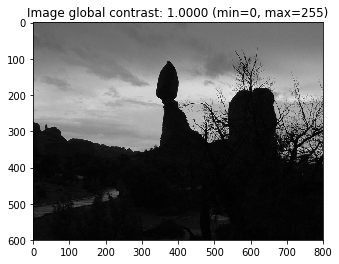

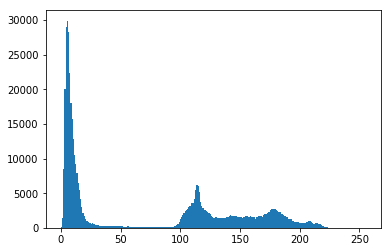

In [1]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        float: The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE
    
    # get min and max gray value
    min = value_range[0]
    max = value_range[1]
    
    # get range (R)
    range = max - min
    
    # get min and max gray value of image
    min_value = np.amin(img)
    max_value = np.amax(img)
    
    # apply global contrast function 1/R (max-min)
    contrast = (1/range) * (max_value - min_value)
    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

/home/hannahlewerentz/anaconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars


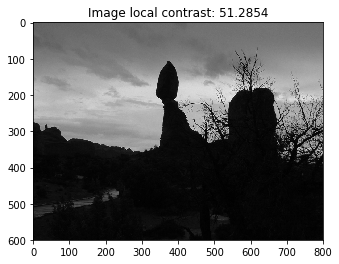

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        float: The local contrast of the image. 
    """

    # YOUR CODE HERE
    
    # dimensions
    M = img.shape[0]
    N = img.shape[1]
    # calculate factor 1/MN
    norm_factor = 1/(M*N)

    # pad with zero
    padded_img = np.pad(img, pad_width=1, mode="constant",constant_values=0)
    # alternatively, pad with edge values
    #img = np.pad(img, pad_width=1, mode="edge")
    
    # initialize the sum to be added to
    local_contrast = 0
    
    # iterate over all pixels of non-padded image
    for x in range(M):
        for y in range(N):
            # get the neighbors from the padded image
            neighbors = padded_img[x+1][y+2]+padded_img[x+1][y]+padded_img[x+2][y+1]+padded_img[x][y+1]
            # subtract the averaged neighbors from
            # original pixel
            local_contrast += img[x][y]-((1/4)*neighbors)
    
    # return the normalized local contrast
    return np.absolute(local_contrast)*norm_factor

img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

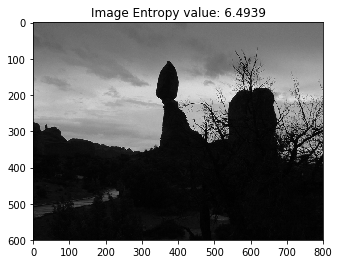

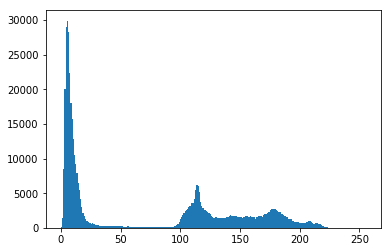

In [3]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        float: The entropy of the image. 
    """
    # YOUR CODE HERE
    
    # get img dimensions
    M = img.shape[0]
    N = img.shape[1]
    
    # flatten
    flat_img = img.flatten()
    # get occurences of each gray value in a dict
    unique, counts = np.unique(flat_img, return_counts=True)
    val_dict = dict(zip(unique, counts))
    # get the probabilities P(ei) for all of the values
    val_dict.update((x, y/(M*N)) for x, y in val_dict.items())
    # apply the formula P(ei)*log2(P(ei))
    val_dict.update((x, (y*np.log2(y))) for x, y in val_dict.items())
    # compute the negative sum, i.e. the entropy
    entropy = sum(val_dict.values()) * -1
    
    return entropy

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

/home/hannahlewerentz/anaconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars


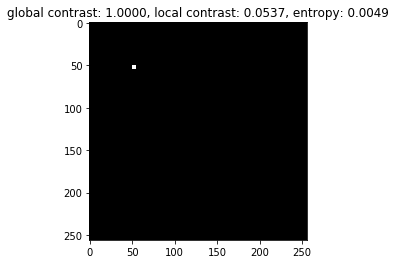

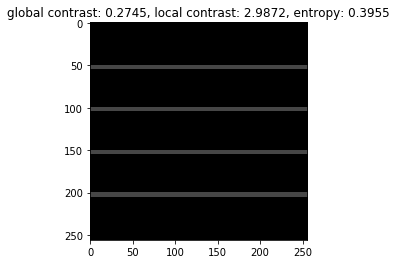

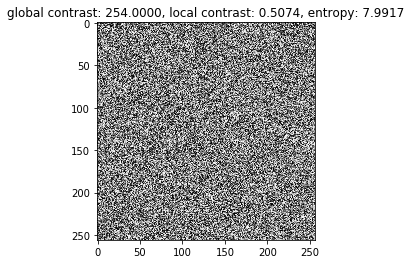

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE

# just a single white square
img1[50:55,50:55] = 255

image_info(img1)


img2 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE

# several stripes of low gray values
img2[50:55] = 70
img2[100:105] = 70
img2[150:155] = 70
img2[200:205] = 70

image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE

# random gray values within the given range
img3 = np.random.randint(0, 255, size=(img3.shape[0],img3.shape[1]))

image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

AHE improves the contrast of an image. Unlike "normal" Histogram Equalization, which operates on the whole image, AHE computes several histograms for each pixel and the predefined regions of the image surrounding them. Thus, a transfer function for each pixel can be computed. 

The major drawback is that it tends to overamplify noise in relatively homogeneous regions of an image (e.g. the sky).

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

Basically, CLAHE works like AHE. It was introduced as a variant of AHE to prevent its major drawback (overamplifying noise) by limiting the amplification to prevent excessive local contrast enhancement for homogeneous regions.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

The computation of AHE requires the computation of a different histogram and transfer function for each pixel in the image. As this computationally expensive, **Interpolation** allows a significant improvement in efficiency without compromising the quality of the result.

First, the image is **partitioned** into rectangular tiles of equal size. Then, a histogram, a cumulative distribution function and a transfer function is then **computed for each tile** (according to the center pixel). All other pixels are assigned **interpolated values** from the center pixels closest to them.

It is valid because the interpolation coefficients reflect the location of pixels to the closest tile center pixels, so that the result is continuous as the pixel approaches a tile center.

Thus, it reduces the number of transfer functions to be computed dramatically with the small additional cost of linear interpolation.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

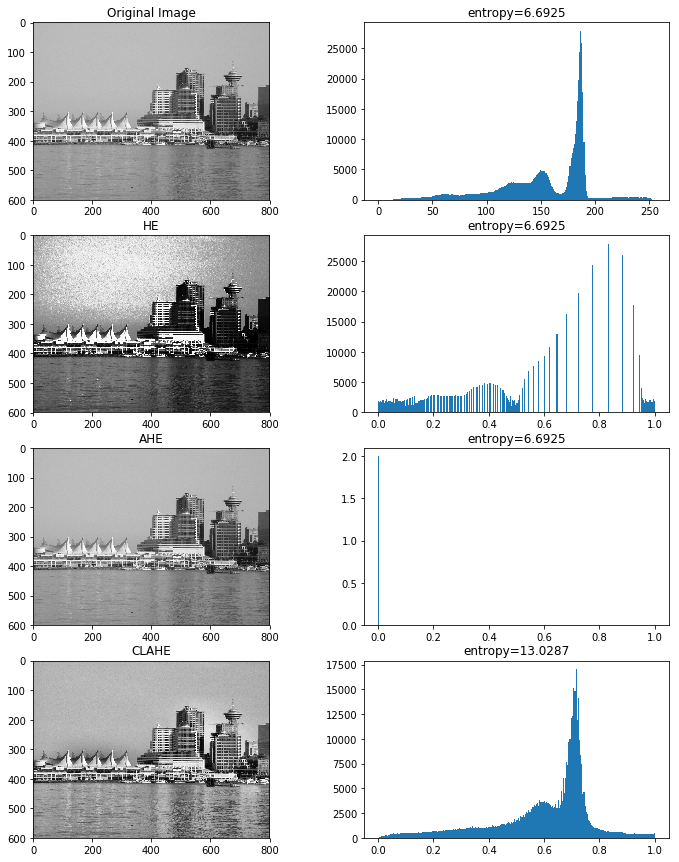

In [5]:
%matplotlib inline
# YOUR CODE HERE
from imageio import imread
import matplotlib.pyplot as plt
import skimage.exposure as exposure

img = imread('images/canada.png', pilmode='L')

img_he = exposure.equalize_hist(img, nbins=256, mask=None) # CHANGE THIS

# SOMEHOW, NORMAL AHE IS NOT AVAILABLE IN EXPOSURE
img_ahe = img # CHANGE THIS

img_clahe = exposure.equalize_adapthist(img, kernel_size=None, clip_limit=0.01, nbins=256) # CHANGE THIS
# YOUR CODE HERE

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

- **Sequential**: often a single color; incremental change in lightness/saturation, best for representing ordered information.

- **Diverging**: two colors; change in lightness/saturation of both colors that meet at an unsaturated color in the middle; good for plotting information with a critical middle value (topography/deviation around zero).

- **Qualitative**: hav various colors; best for representing information without ordering/relationships.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

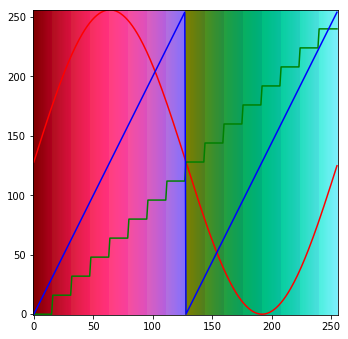

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

color = []

# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
              lambda x: (x//16) * 16,
              lambda x: (2*x) % 256)))
# YOUR CODE HERE

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} = \gamma g + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

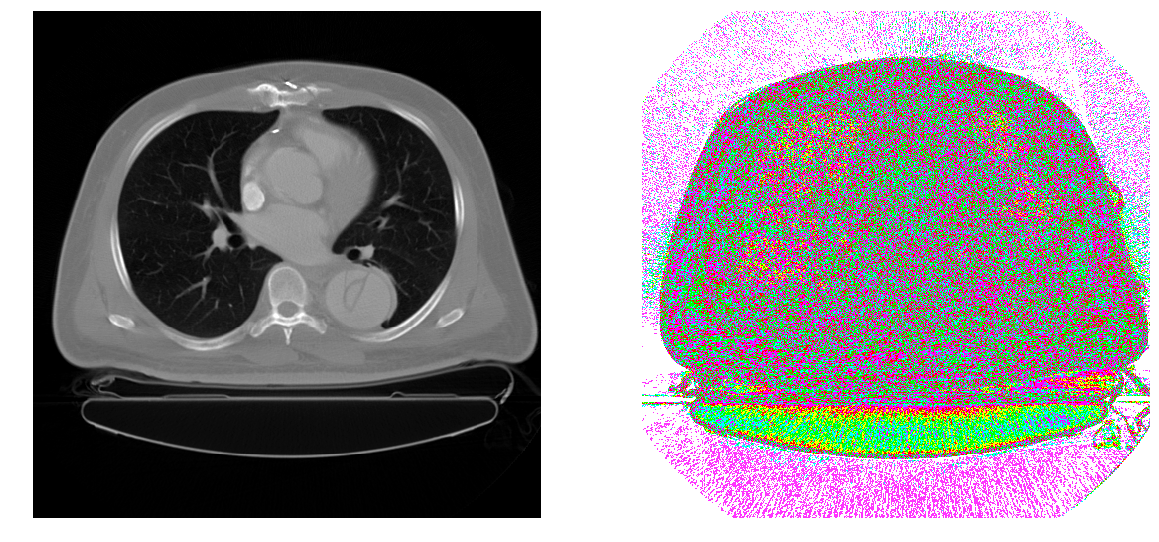

In [33]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 0.5
rotations = -1.5
hue = 1.0
gamma = 1.0
m = np.mat([[0.14861, 1.78277],
            [-0.29227, -0.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: np.ndarray of shape (256,3)
        The cube helix color map.
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        # YOUR CODE HERE
        theta = 2 * np.pi * ((start_color+i)/3 + rotations*i)
        a = (gamma * hue * i * (1-gamma*i))/2
        sin_cos = np.array([[np.cos(theta)], [np.sin(theta)]])
        rgb = gamma * i + np.matmul((a * m), sin_cos)
        lookup_table[i] = rgb.flatten()
        
        
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Parameters:
        img: np.ndarray
            The image (ndim=2)
        lookup_table: np.ndarray
            The lookup table (shape=(256,3))
    Return:
        The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# YOUR CODE HERE